In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Phase 1: Data Exploration & Initial Assessment


## LOAD DATASET

In [3]:
data=pd.read_csv("SampleSuperstore_with_nulls.csv")
data

,ShipMode,Segment,Country,City,State,Postal_Code,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
0,Second Class,CONSUMER,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,NaN,2,0.0,41.9136
1,Second Class,CONSUMER,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.940,3,NaN,219.5820
2,Second Class,CORPORATE,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.620,2,0.0,6.8714
3,Standard Class,CONSUMER,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,NaN,5,NaN,-383.0310
4,Standard Class,CONSUMER,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.368,2,0.2,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9979,Second Class,CONSUMER,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9980,Standard Class,CONSUMER,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,NaN,2,0.2,15.6332
9981,Standard Class,CONSUMER,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9982,Standard Class,CONSUMER,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,NaN,4,0.0,13.3200


In [4]:
data.columns

Index(['ShipMode', 'Segment', 'Country', 'City', 'State', 'Postal_Code',
       'Region', 'Category', 'Sub_Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

### UNDERSTAND THE DATA

In [5]:
data.shape

(9984, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9984 entries, 0 to 9983
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ShipMode      9984 non-null   object 
 1   Segment       9984 non-null   object 
 2   Country       9984 non-null   object 
 3   City          9984 non-null   object 
 4   State         9984 non-null   object 
 5   Postal_Code   9984 non-null   int64  
 6   Region        9984 non-null   object 
 7   Category      9984 non-null   object 
 8   Sub_Category  9984 non-null   object 
 9   Sales         7988 non-null   float64
 10  Quantity      9984 non-null   int64  
 11  Discount      7988 non-null   float64
 12  Profit        9984 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1014.1+ KB


In [7]:
data.head()

,ShipMode,Segment,Country,City,State,Postal_Code,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
0,Second Class,CONSUMER,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,NaN,2,0.0,41.9136
1,Second Class,CONSUMER,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.940,3,NaN,219.5820
2,Second Class,CORPORATE,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.620,2,0.0,6.8714
3,Standard Class,CONSUMER,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,NaN,5,NaN,-383.0310
4,Standard Class,CONSUMER,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.368,2,0.2,2.5164


In [8]:
data.describe

<bound method NDFrame.describe of             ShipMode    Segment        Country             City       State  \
0       Second Class   CONSUMER  United States        Henderson    Kentucky   
1       Second Class   CONSUMER  United States        Henderson    Kentucky   
2       Second Class  CORPORATE  United States      Los Angeles  California   
3     Standard Class   CONSUMER  United States  Fort Lauderdale     Florida   
4     Standard Class   CONSUMER  United States  Fort Lauderdale     Florida   
...              ...        ...            ...              ...         ...   
9979    Second Class   CONSUMER  United States            Miami     Florida   
9980  Standard Class   CONSUMER  United States       Costa Mesa  California   
9981  Standard Class   CONSUMER  United States       Costa Mesa  California   
9982  Standard Class   CONSUMER  United States       Costa Mesa  California   
9983    Second Class   CONSUMER  United States      Westminster  California   

      Postal_Code

# Phase 2: Data Cleaning & Manipulation

### FINDING MISSING VALUES

In [9]:
data.isnull().sum()

ShipMode           0
Segment            0
Country            0
City               0
State              0
Postal_Code        0
Region             0
Category           0
Sub_Category       0
Sales           1996
Quantity           0
Discount        1996
Profit             0
dtype: int64

In [10]:
data['Sales']=pd.to_numeric(data['Sales'],errors='coerce')
data['Discount']=pd.to_numeric(data['Discount'],errors='coerce')

In [11]:
data['Sales']=data["Sales"].fillna(data['Sales'].median())
data['Discount']=data["Discount"].fillna(data['Discount'].median())


In [12]:
data.isnull().sum()

ShipMode        0
Segment         0
Country         0
City            0
State           0
Postal_Code     0
Region          0
Category        0
Sub_Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [13]:
data.value_counts()

ShipMode        Segment      Country        City           State       Postal_Code  Region   Category         Sub_Category  Sales    Quantity  Discount  Profit   
First Class     CONSUMER     United States  Abilene        Texas       79605        Central  Office Supplies  Appliances    1.392    2         0.8       -3.7584      1
Standard Class  CONSUMER     United States  San Francisco  California  94110        West     Office Supplies  Paper         9.680    1         0.2        4.6464      1
                                                                                                              Envelopes     10.860   3         0.0        5.1042      1
                                                                                                                            55.592   2         0.0        78.8942     1
                                                                                                              Labels        7.380    2         0.0        3.4686     

### Handle Duplicates

In [14]:
data.duplicated().sum()

0

In [15]:
data.drop_duplicates(inplace=True)

In [16]:
data.duplicated().sum()

0

### Standardize Categories

In [17]:
data['Segment']=data['Segment'].str.strip().str.upper()

In [18]:
data['Country'] = data['Country'].str.strip().str.title()

In [19]:
data

,ShipMode,Segment,Country,City,State,Postal_Code,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
0,Second Class,CONSUMER,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,55.592,2,0.0,41.9136
1,Second Class,CONSUMER,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.940,3,0.2,219.5820
2,Second Class,CORPORATE,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.620,2,0.0,6.8714
3,Standard Class,CONSUMER,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,55.592,5,0.2,-383.0310
4,Standard Class,CONSUMER,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.368,2,0.2,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9979,Second Class,CONSUMER,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9980,Standard Class,CONSUMER,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,55.592,2,0.2,15.6332
9981,Standard Class,CONSUMER,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9982,Standard Class,CONSUMER,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,55.592,4,0.0,13.3200


In [31]:
data['ShipMode'] = data['ShipMode'].str.strip()

In [ ]:
data

In [ ]:
data

In [ ]:
# Rename multiple columns
data.rename(columns={'Postal Code': 'Postal_Code','Sub-Category': 'Sub_Category','Ship Mode': 'ShipMode'}, inplace=True)

In [ ]:
data

In [ ]:
data.info()

### Non-Visual Bivariate Analysis

In [ ]:
#Categorical vs Categorical: Compare group-wise counts 

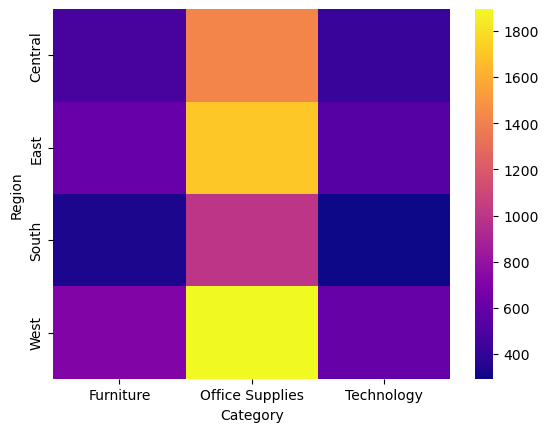

In [32]:
sns.heatmap(pd.crosstab(data['Region'],data['Category']), cmap = 'plasma')
plt.show()


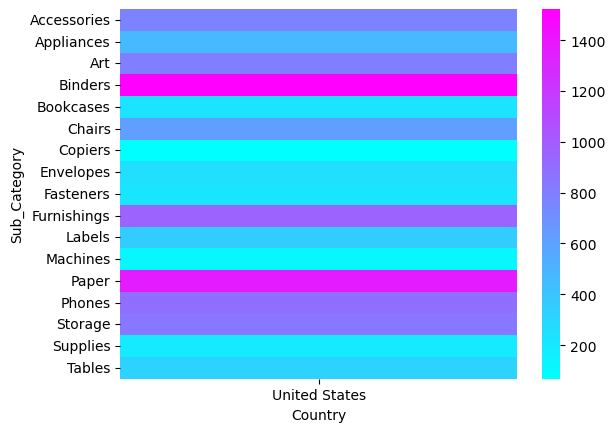

In [33]:
sns.heatmap(pd.crosstab(data['Sub_Category'],data['Country']), cmap = 'cool')
plt.show()

In [ ]:
#Categorical vs Numerical

In [34]:
a=data.groupby('City')['Sales'].mean().head(10).sort_index(ascending = False)
b=data.groupby('Region')['Profit'].mean().head(10)

In [35]:
data.head(3)

,ShipMode,Segment,Country,City,State,Postal_Code,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
0,Second Class,CONSUMER,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,NaN,2,0.0,41.9136
1,Second Class,CONSUMER,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,NaN,219.5820
2,Second Class,CORPORATE,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.62,2,0.0,6.8714


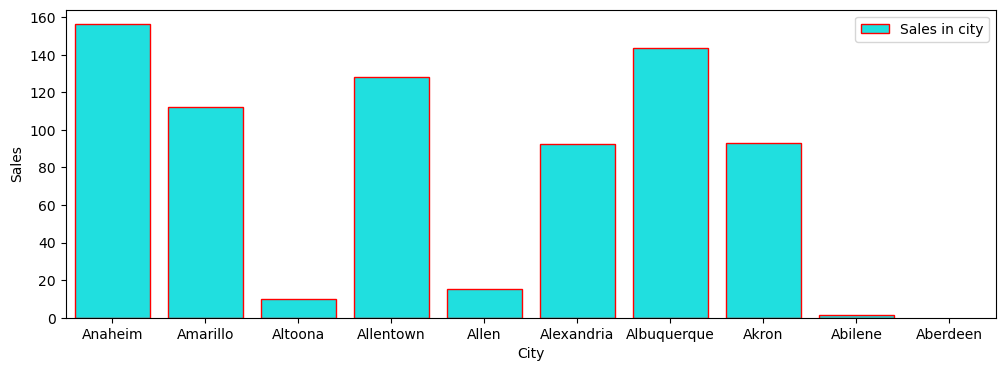

In [30]:
plt.figure(figsize=(12,4))
sns.barplot(data = a, label = 'Sales in city', color = 'cyan', edgecolor = 'r')
plt.legend()
plt.show()

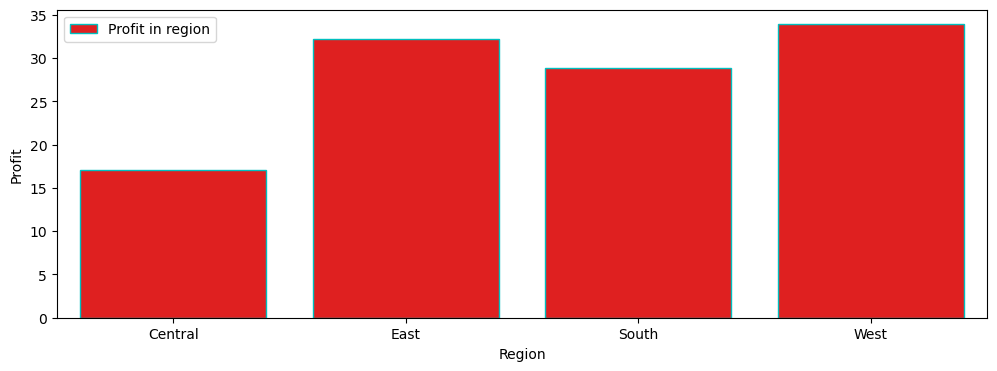

In [36]:
plt.figure(figsize=(12,4))
sns.barplot(data = b, label = 'Profit in region', color = 'r', edgecolor = 'c')
plt.legend()
plt.show()

In [22]:
data.head(2)

,ShipMode,Segment,Country,City,State,Postal_Code,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
0,Second Class,CONSUMER,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,55.592,2,0.0,41.9136
1,Second Class,CONSUMER,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.940,3,0.2,219.5820


In [37]:

np.random.seed(42)

cols_to_null = ['Sales', 'Discount']

# Calculate 20% of the rows
n_rows = int(0.2 * len(data))

# Add nulls to each column
for col in cols_to_null:
    null_indices = np.random.choice(data.index, n_rows, replace=False)
    data.loc[null_indices, col] = np.nan
data.to_csv("SampleSuperstore_with_nulls.csv", index=False)




In [38]:
data.isnull().sum()

ShipMode           0
Segment            0
Country            0
City               0
State              0
Postal_Code        0
Region             0
Category           0
Sub_Category       0
Sales           1996
Quantity           0
Discount        1996
Profit             0
dtype: int64

In [25]:
#Numerical vs Numerical

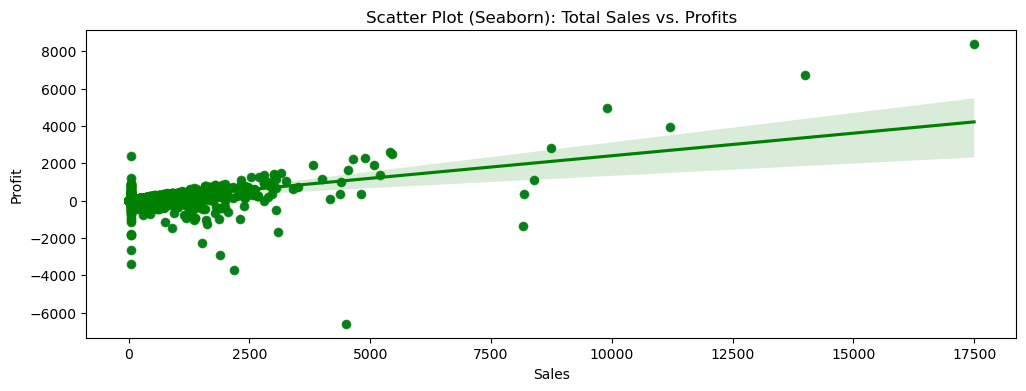

In [26]:

plt.figure(figsize=(12,4))
sns.scatterplot(data=data,x='Sales',y="Profit")
sns.regplot(data=data, x='Sales', y='Profit', color = 'g')
plt.title("Scatter Plot (Seaborn): Total Sales vs. Profits")
plt.show()

In [27]:

data.isna()

,ShipMode,Segment,Country,City,State,Postal_Code,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9979,False,False,False,False,False,False,False,False,False,False,False,False,False
9980,False,False,False,False,False,False,False,False,False,True,False,False,False
9981,False,False,False,False,False,False,False,False,False,False,False,False,False
9982,False,False,False,False,False,False,False,False,False,True,False,False,False
